In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [8]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data['class'].value_counts()

class
0    4825
1     747
Name: count, dtype: int64

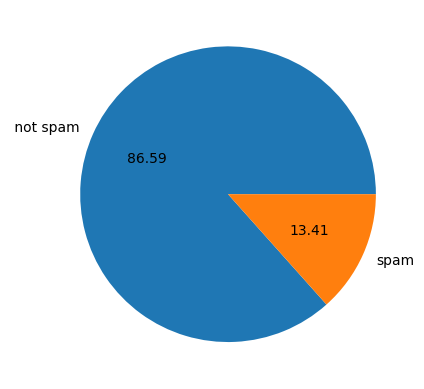

In [11]:
plt.pie(data['class'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [12]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data['num_characters']=data['message'].apply(len)
data.head()

,class,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# For a number of words:

In [15]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, ï¿½_, b, going, to, esplanade, fr, home...
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [16]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(5)

,class,message,num_characters,num_words
2579,0,I dunno until when... Lets go learn pilates...,46,10
3233,0,Yup ï¿½_ not comin :-(,22,7
1675,0,Painful words- \I thought being Happy was the ...,81,15
4632,0,Oh wow thats gay. Will firmware update help,43,9
2051,0,Hey darlin.. i can pick u up at college if u t...,84,23


In [17]:
data[data['class']==0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4825.000000,4825.000000
mean,71.234197,17.276269
std,58.084357,13.988585
min,2.000000,1.000000
25%,33.000000,8.000000
50%,52.000000,13.000000
75%,92.000000,22.000000
max,910.000000,220.000000


In [18]:
data[data['class']==1][['num_characters','num_words',]].describe()

,num_characters,num_words
count,747.000000,747.000000
mean,139.340027,27.891566
std,29.318159,6.867007
min,13.000000,2.000000
25%,133.000000,25.000000
50%,150.000000,29.000000
75%,158.000000,32.000000
max,225.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

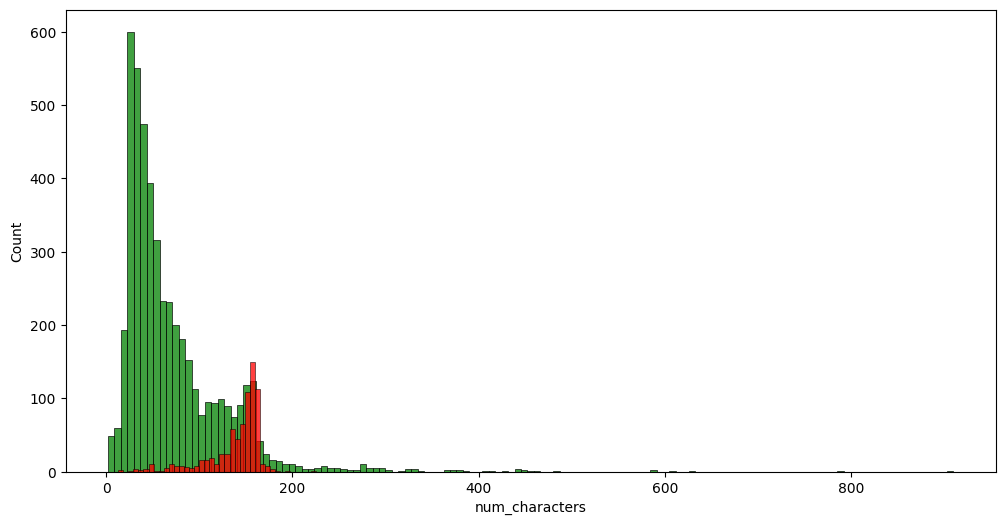

In [19]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['class']==0]['num_characters'],color='green')
sns.histplot(data[data['class']==1]['num_characters'],color = 'red')

# 3. Data Preprocessing

In [20]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [21]:
#Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [22]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [24]:
data['transformed_msg']=data['message'].apply(text_transform)

## For Spam:

In [25]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [26]:
spam_wc=wc.generate(data[data['class']==1]['transformed_msg'].str.cat(sep=""))

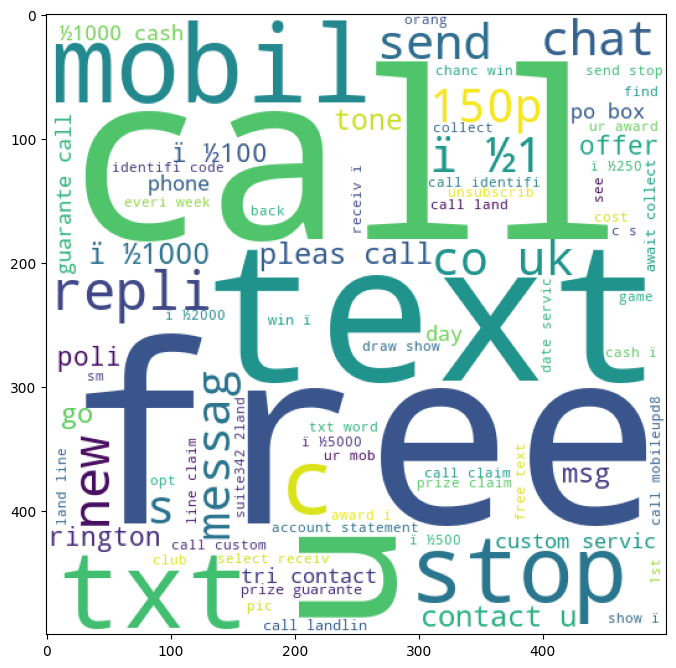

In [27]:
plt.figure(figsize=(8,12))
plt.imshow(spam_wc)

## for Ham:

In [28]:
ham_wc=wc.generate(data[data['class']==0]['transformed_msg'].str.cat(sep=""))

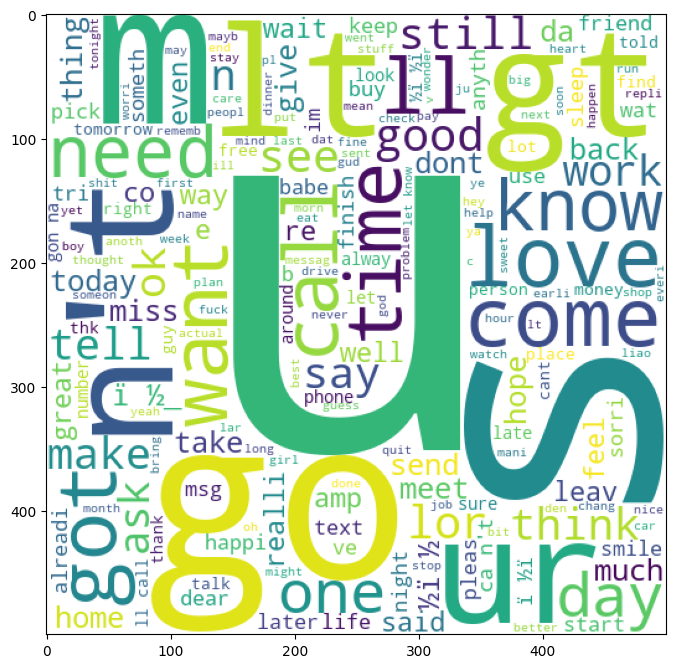

In [29]:
plt.figure(figsize=(8,12))
plt.imshow(ham_wc)

In [30]:
spam_corpus=[]
for msg in data[data['class']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [31]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 219,
         'entri': 26,
         '2': 174,
         'wkli': 14,
         'comp': 10,
         'win': 61,
         'fa': 4,
         'cup': 5,
         'final': 17,
         'tkt': 4,
         '21st': 2,
         'may': 7,
         '2005.': 2,
         'text': 139,
         '87121': 4,
         'receiv': 37,
         'question': 12,
         'std': 9,
         'txt': 169,
         'rate': 31,
         'c': 51,
         "'s": 72,
         'appli': 29,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 23,
         'week': 62,
         'word': 25,
         'back': 23,
         "'d": 2,
         'like': 13,
         'fun': 9,
         'still': 7,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chg': 2,
         'send': 70,
         'ï¿½1.50': 20,
         'rcv': 2,
         'winner': 16,
         'valu': 11,
         'network': 28,
         'custom': 51,
         'select': 31,
         'receive

In [32]:
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ("'s", 72),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51)]

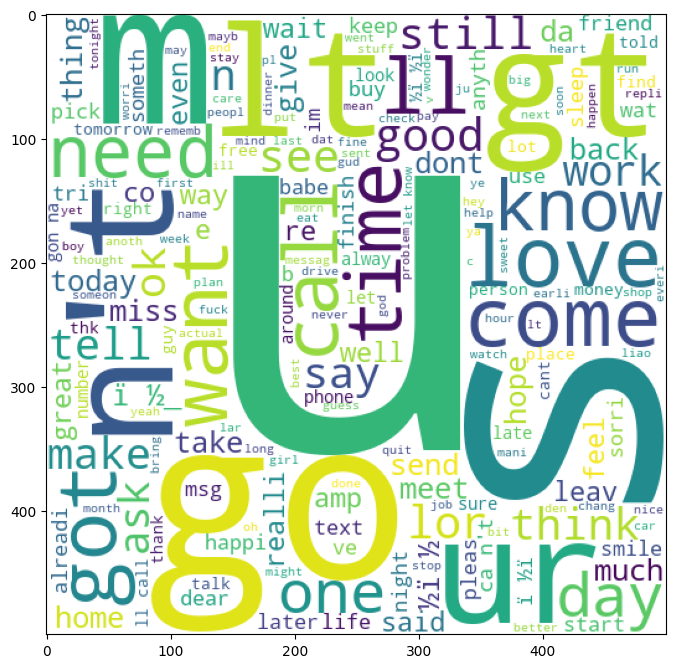

In [33]:
plt.figure(figsize=(8,12))
plt.imshow(ham_wc)

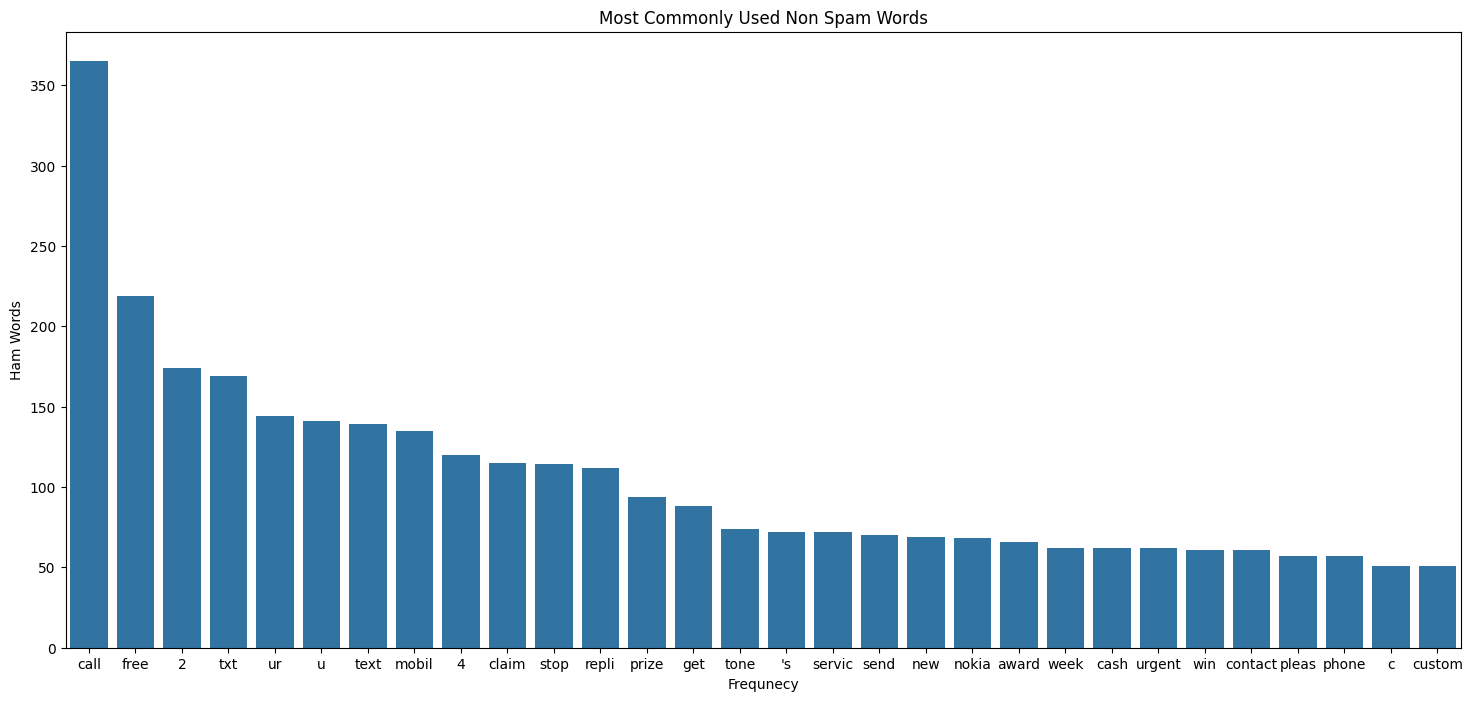

In [34]:
from collections import Counter
plt.figure(figsize=(18,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

# Model  Building

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv=CountVectorizer()

In [37]:
X=data['message']
y=data['class']

In [38]:
X.shape

(5572,)

In [39]:
y.shape

(5572,)

In [40]:
data.isnull().sum()

class              0
message            0
num_characters     0
num_words          0
transformed_msg    0
dtype: int64

In [41]:
X=cv.fit_transform(X)

In [42]:
X

<5572x8710 sparse matrix of type '<class 'numpy.int64'>'
	with 74165 stored elements in Compressed Sparse Row format>

1. The Cat
2. The Dog
3. The Bird

    The Cat  Dog  Bird
1.   1   1    0     0
2.    1  0    1      0
3.    1  0    0      1

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [45]:
x_train.shape

(4457, 8710)

In [46]:
x_test.shape

(1115, 8710)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
model=MultinomialNB()

In [49]:
model.fit(x_train, y_train)

MultinomialNB()

In [50]:
model.score(x_test, y_test)

0.979372197309417

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.979372197309417
[[952  13]
 [ 10 140]]
0.9150326797385621


In [54]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.979372197309417
[[964   1]
 [ 22 128]]
0.9922480620155039


In [55]:
# tfidf --> MNB

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [60]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.8457399103139014, 0.4153846153846154)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8457399103139014
Precision -  0.4153846153846154
For  KN
Accuracy -  0.9183856502242153
Precision -  1.0
For  NB
Accuracy -  0.979372197309417
Precision -  0.9150326797385621
For  DT
Accuracy -  0.9533632286995516
Precision -  0.9152542372881356
For  LR
Accuracy -  0.9757847533632287
Precision -  0.9767441860465116
For  RF
Accuracy -  0.9766816143497757
Precision -  1.0
For  AdaBoost
Accuracy -  0.9659192825112107
Precision -  0.9375
For  BgC
Accuracy -  0.9730941704035875
Precision -  0.9225352112676056
For  ETC
Accuracy -  0.9802690582959641
Precision -  1.0
For  GBDT
Accuracy -  0.9596412556053812
Precision -  0.981651376146789
For  xgb
Accuracy -  0.9748878923766816
Precision -  0.9765625


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.918386,1.000000
5,RF,0.976682,1.000000
8,ETC,0.980269,1.000000
9,GBDT,0.959641,0.981651
4,LR,0.975785,0.976744
10,xgb,0.974888,0.976562
6,AdaBoost,0.965919,0.937500
7,BgC,0.973094,0.922535
3,DT,0.953363,0.915254
2,NB,0.979372,0.915033


In [63]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.918386
1,RF,Accuracy,0.976682
2,ETC,Accuracy,0.980269
3,GBDT,Accuracy,0.959641
4,LR,Accuracy,0.975785
5,xgb,Accuracy,0.974888
6,AdaBoost,Accuracy,0.965919
7,BgC,Accuracy,0.973094
8,DT,Accuracy,0.953363
9,NB,Accuracy,0.979372


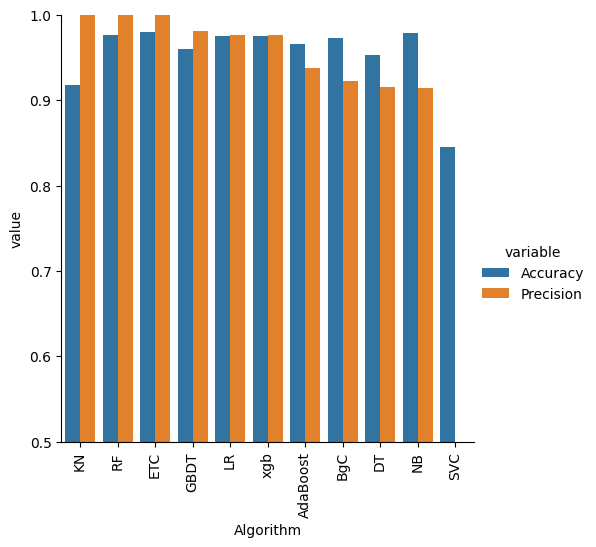

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [68]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [69]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.918386,1.000000,0.918386,1.000000,0.918386,1.000000,0.918386,1.000000
1,RF,0.976682,1.000000,0.976682,1.000000,0.976682,1.000000,0.976682,1.000000
2,ETC,0.980269,1.000000,0.980269,1.000000,0.980269,1.000000,0.980269,1.000000
3,GBDT,0.959641,0.981651,0.959641,0.981651,0.959641,0.981651,0.959641,0.981651
4,LR,0.975785,0.976744,0.975785,0.976744,0.975785,0.976744,0.975785,0.976744
5,xgb,0.974888,0.976562,0.974888,0.976562,0.974888,0.976562,0.974888,0.976562
6,AdaBoost,0.965919,0.937500,0.965919,0.937500,0.965919,0.937500,0.965919,0.937500
7,BgC,0.973094,0.922535,0.973094,0.922535,0.973094,0.922535,0.973094,0.922535
8,DT,0.953363,0.915254,0.953363,0.915254,0.953363,0.915254,0.953363,0.915254
9,NB,0.979372,0.915033,0.979372,0.915033,0.979372,0.915033,0.979372,0.915033


In [71]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9838565022421525
Precision 1.0


In [74]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier

In [76]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [77]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9910313901345291
Precision 0.9929577464788732


In [78]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [79]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
result=model.predict(x_test)

In [81]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

In [82]:
from win32com.client import Dispatch

In [83]:
def speak(text):
    speak=Dispatch(("SAPI.SpVoice"))
    speak.Speak(text)

In [84]:
def result(msg):
    data = [msg]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

In [85]:
import tkinter as tk

In [86]:
root=tk.Tk()
root.geometry("500x500")
l2=tk.Label(root, text="Email Spam Classification Application")
l2.pack()
l1=tk.Label(root, text="Enter Your Message:")
l1.pack()
text=tk.Entry(root)
text.pack()
def result():
    data = [text.get()]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")
B=tk.Button(root, text="Click", command=result)
B.pack()

root.mainloop()